# Online Shopping Behavior Analysis 
## (Exploratory Data Analysis on Walmart E-Commerce Dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

df = pd.read_csv('walmart_com-ecommerce_product_details.csv')

In [2]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
df.head() #For reading the dataset but it gives by default 5rows.

,Uniq Id,Crawl Timestamp,Product Url,Product Name,Description,List Price,Sale Price,Brand,Item Number,Gtin,Package Size,Category,Postal Code,Available
0,459b05f3cb7f1cba0a36fdc042ff0056,2019-03-22 17:10:04 +0000,https://www.walmart.com/ip/In-Style-Eyes-Catey...,In Style Eyes Cateye Two Tone Reading Glasses,Stunning Looking Cat Eye Two Tone Reading Glas...,19.99,19.99,In Style Eyes,NaN,9.664782e+10,NaN,Health|Home Health Care|Daily Living Aids,NaN,True
1,6a1bddc2801cbba539be0c182498d4dd,2019-03-22 17:10:04 +0000,https://www.walmart.com/ip/In-Style-Eyes-Catey...,In Style Eyes Cateye Two Tone Reading Glasses,Stunning Looking Cat Eye Two Tone Reading Glas...,19.99,19.99,In Style Eyes,NaN,9.664782e+10,NaN,Health|Home Health Care|Daily Living Aids,NaN,True
2,4d237340ae8361b4bb4f51e8a6128c8b,2019-03-22 17:10:04 +0000,https://www.walmart.com/ip/In-Style-Eyes-Catey...,In Style Eyes Cateye Two Tone Reading Glasses,Stunning Looking Cat Eye Two Tone Reading Glas...,19.99,19.99,In Style Eyes,NaN,9.664782e+10,NaN,Health|Home Health Care|Daily Living Aids,NaN,True
3,d6dbc29d5782a88db9082d81ad04089c,2019-03-22 17:10:04 +0000,https://www.walmart.com/ip/In-Style-Eyes-Catey...,In Style Eyes Cateye Two Tone Reading Glasses,Stunning Looking Cat Eye Two Tone Reading Glas...,19.99,19.99,In Style Eyes,NaN,9.664782e+10,NaN,Health|Home Health Care|Daily Living Aids,NaN,True
4,9e51356d763e53dc622c92e3a86f9ef8,2019-03-22 17:46:46 +0000,https://www.walmart.com/ip/Upper-Crust-Caribbe...,Upper Crust Caribbean Coconut Panko Bread Crum...,| Size information : 1-10 POUND Upper Crust Ca...,39.96,39.96,Upper Crust,NaN,8.907490e+11,NaN,Food|Baking|Baking Mixes,NaN,False


In [4]:
df.shape

(30000, 14)

In [5]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Product Url', 'Product Name',
       'Description', 'List Price', 'Sale Price', 'Brand', 'Item Number',
       'Gtin', 'Package Size', 'Category', 'Postal Code', 'Available'],
      dtype='object')

In [6]:
df.describe ()#describes the dataset.

,List Price,Sale Price,Item Number,Gtin,Postal Code
count,29881.000000,29881.000000,3.891000e+03,2.966500e+04,0.0
mean,94.430457,88.763223,1.802987e+11,6.035239e+11,NaN
std,402.535560,386.598926,6.965897e+11,2.452373e+11,NaN
min,0.590000,0.100000,3.464885e+07,4.176000e+03,NaN
25%,15.260000,14.990000,6.422131e+10,6.027983e+11,NaN
50%,27.950000,25.000000,8.147500e+10,6.892886e+11,NaN
75%,58.980000,55.230000,8.892741e+10,7.292335e+11,NaN
max,22144.550000,22144.550000,9.788866e+12,9.912112e+11,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniq Id          30000 non-null  object 
 1   Crawl Timestamp  30000 non-null  object 
 2   Product Url      30000 non-null  object 
 3   Product Name     30000 non-null  object 
 4   Description      29912 non-null  object 
 5   List Price       29881 non-null  float64
 6   Sale Price       29881 non-null  float64
 7   Brand            28966 non-null  object 
 8   Item Number      3891 non-null   float64
 9   Gtin             29665 non-null  float64
 10  Package Size     22755 non-null  object 
 11  Category         29266 non-null  object 
 12  Postal Code      0 non-null      float64
 13  Available        30000 non-null  bool   
dtypes: bool(1), float64(5), object(8)
memory usage: 3.0+ MB


### finding null values

In [8]:
# 1. Data Cleaning: Handling Missing Values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Uniq Id                0
Crawl Timestamp        0
Product Url            0
Product Name           0
Description           88
List Price           119
Sale Price           119
Brand               1034
Item Number        26109
Gtin                 335
Package Size        7245
Category             734
Postal Code        30000
Available              0
dtype: int64


### finding null values

In [9]:

# Filling missing values for numerical columns with mean
df['List Price'].fillna(df['List Price'].mean(), inplace=True)
df['Sale Price'].fillna(df['Sale Price'].mean(), inplace=True)

#### finding the percentage of null values

In [10]:
# Filling missing values for categorical columns with mode
df['Brand'].fillna(df['Brand'].mode()[0], inplace=True)
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

In [11]:
# Dropping irrelevant columns
df = df.drop(['Uniq Id', 'Crawl Timestamp', 'Product Url', 'Description', 'Item Number', 'Gtin', 'Postal Code'], axis=1)

In [12]:
# 2. Handling Duplicate Records
df.drop_duplicates(inplace=True)

In [13]:
# 3. Outlier Detection and Handling using IQR method
Q1 = df['List Price'].quantile(0.25)
Q3 = df['List Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['List Price'] = np.where(df['List Price'] > upper_bound, upper_bound,
                            np.where(df['List Price'] < lower_bound, lower_bound, df['List Price']))

In [14]:
# 4. Feature Engineering: Creating new features
df['Discount'] = df['List Price'] - df['Sale Price']
df['Discount Percent'] = (df['Discount'] / df['List Price']) * 100

In [15]:
# 5. Feature Scaling
scaler = MinMaxScaler()
df[['List Price', 'Sale Price', 'Discount', 'Discount Percent']] = scaler.fit_transform(df[['List Price', 'Sale Price', 'Discount', 'Discount Percent']])


D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and a

In [16]:
# 6. Principal Component Analysis (PCA) for Dimensionality Reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['List Price', 'Sale Price', 'Discount', 'Discount Percent']])
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]


D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


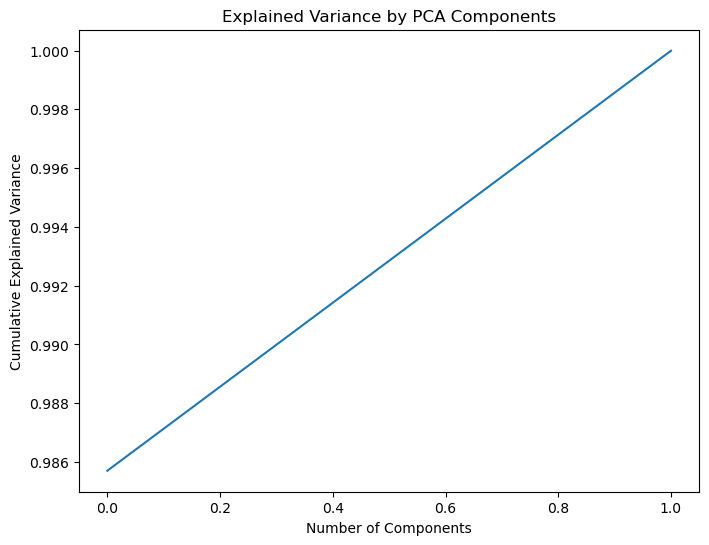

In [17]:
# PCA Explained Variance Plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [18]:
# 7. t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(df[['List Price', 'Sale Price', 'Discount', 'Discount Percent']])
df['t-SNE1'] = tsne_results[:, 0]
df['t-SNE2'] = tsne_results[:, 1]

D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [19]:
# 8. KMeans Clustering with optimal clusters
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['PCA1', 'PCA2']])

D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Bar graph

In [20]:
# Silhouette Score for cluster quality
sil_score = silhouette_score(df[['PCA1', 'PCA2']], df['Cluster'])
print(f"Silhouette Score for KMeans clustering: {sil_score}")


D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\INT projec

Silhouette Score for KMeans clustering: 0.7223779472563219


D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\INT projects\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\INT pro

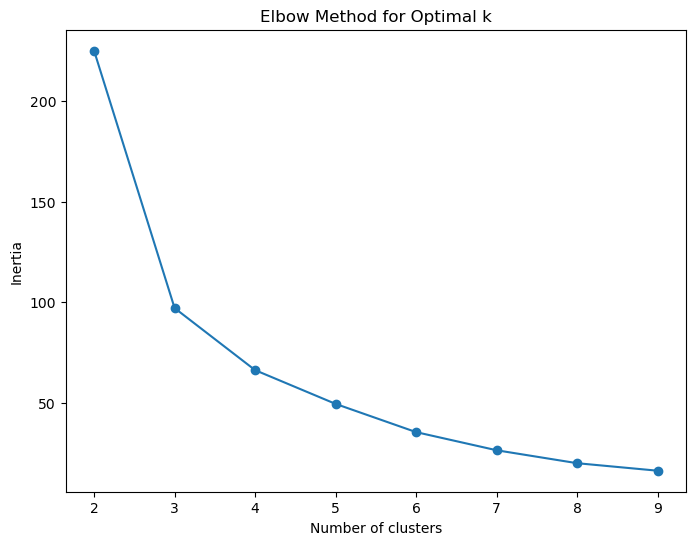

In [21]:
# KMeans Elbow Method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['PCA1', 'PCA2']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

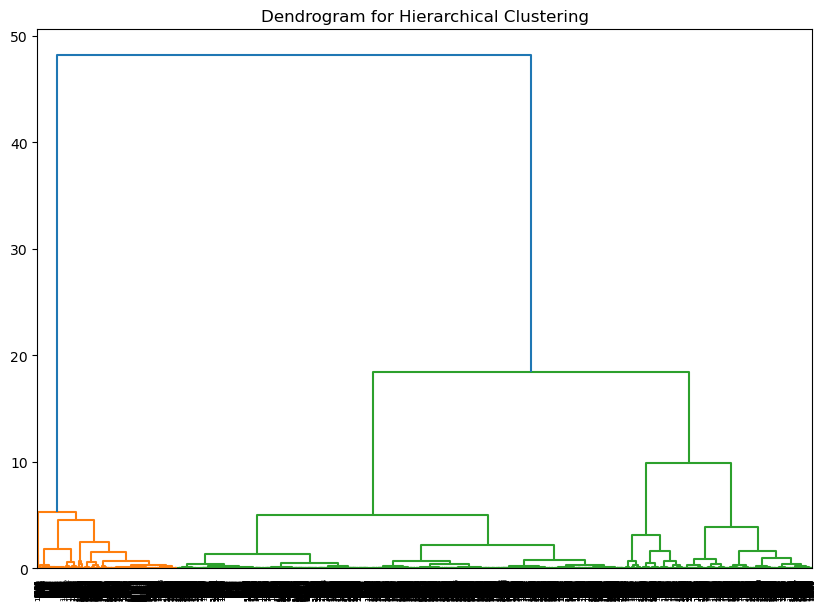

In [22]:
# 9. Hierarchical Clustering
linked = linkage(df[['PCA1', 'PCA2']], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [23]:
# Adding Hierarchical Clustering labels to the dataset
df['HCluster'] = pd.Series(linkage(df[['PCA1', 'PCA2']], method='ward')[:, -1])



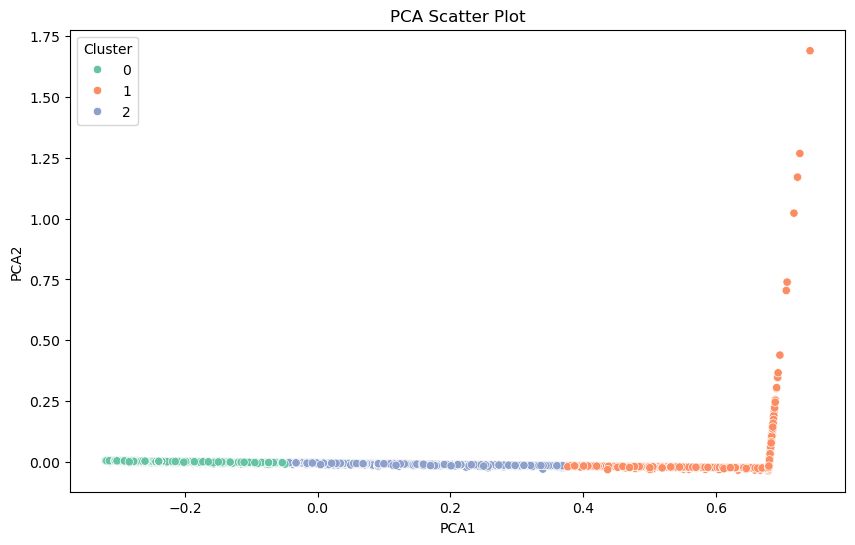

In [24]:
# 10. Visualizations

# Scatter plot for PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('PCA Scatter Plot')
plt.show()

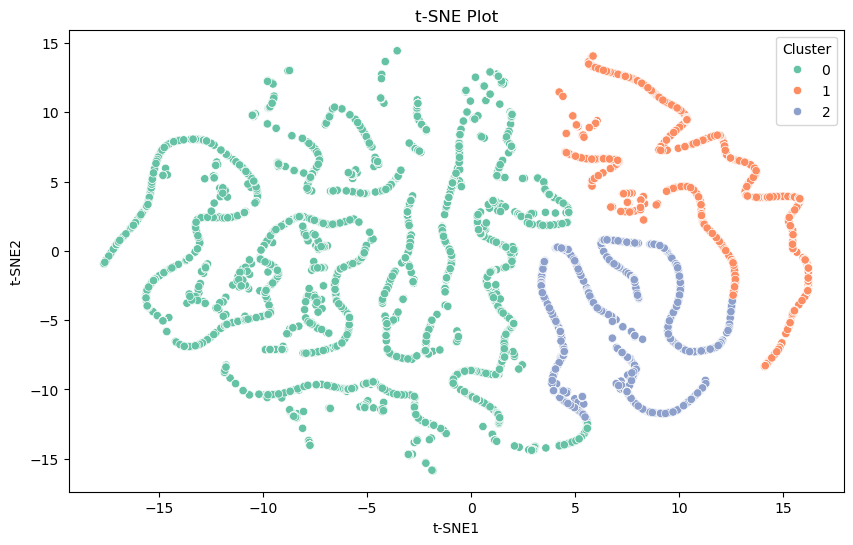

In [25]:
# t-SNE scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Cluster', data=df, palette='Set2')
plt.title('t-SNE Plot')
plt.show()

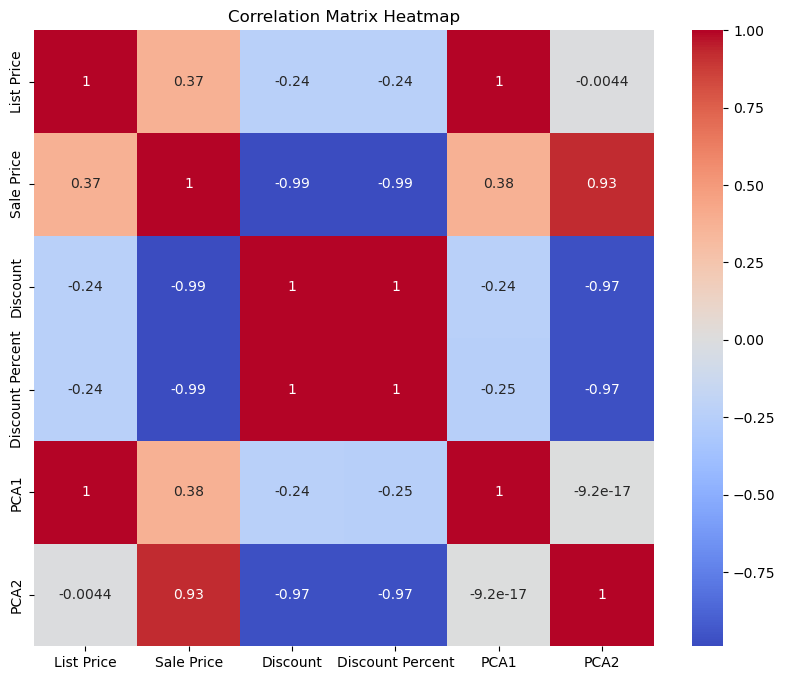

In [26]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[['List Price', 'Sale Price', 'Discount', 'Discount Percent', 'PCA1', 'PCA2']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

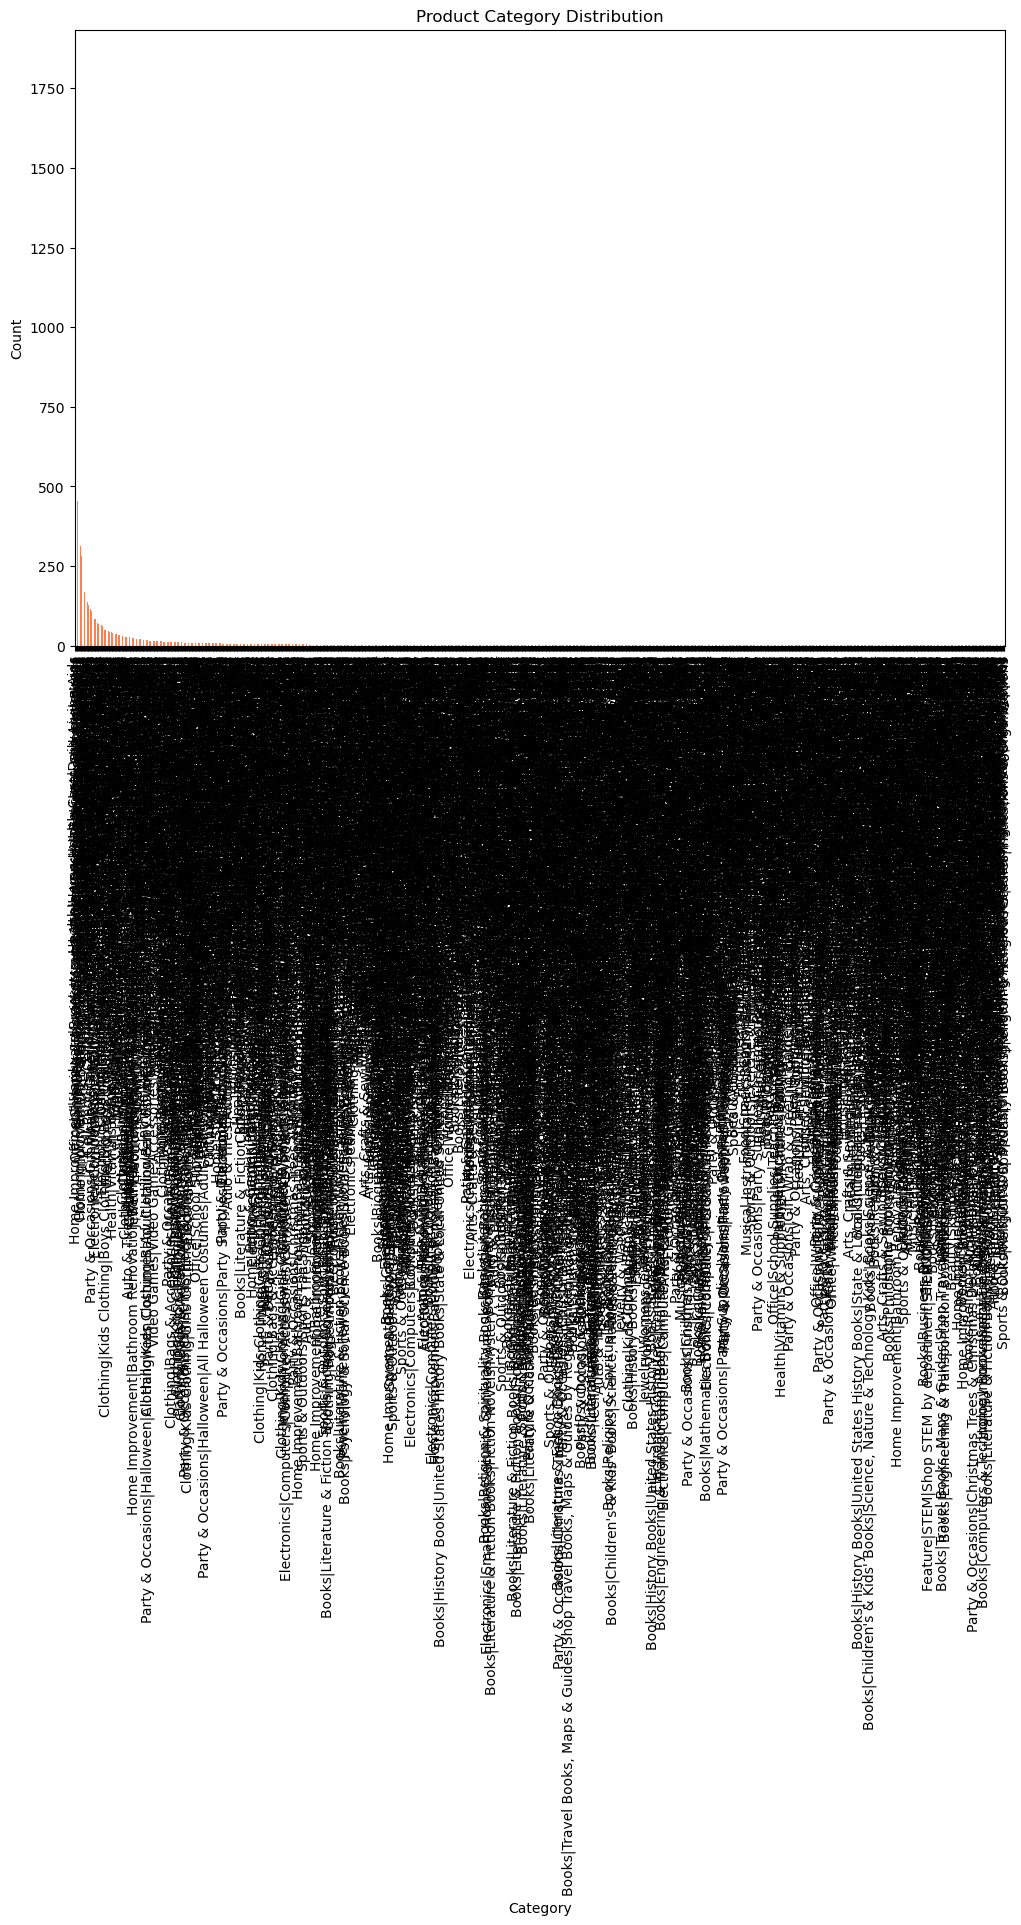

In [27]:
# Bar Plot of Product Categories
plt.figure(figsize=(12, 8))
df['Category'].value_counts().plot(kind='bar', color='coral')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

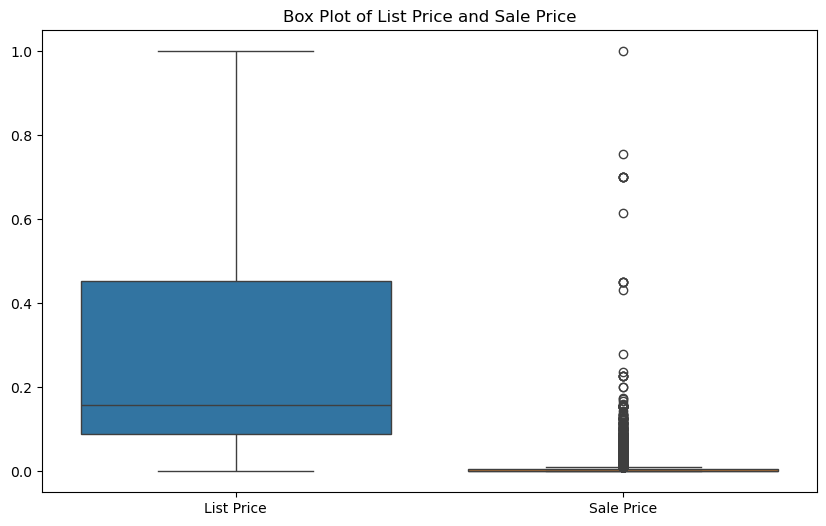

In [28]:
# Box plot of List Price and Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['List Price', 'Sale Price']])
plt.title('Box Plot of List Price and Sale Price')
plt.show()

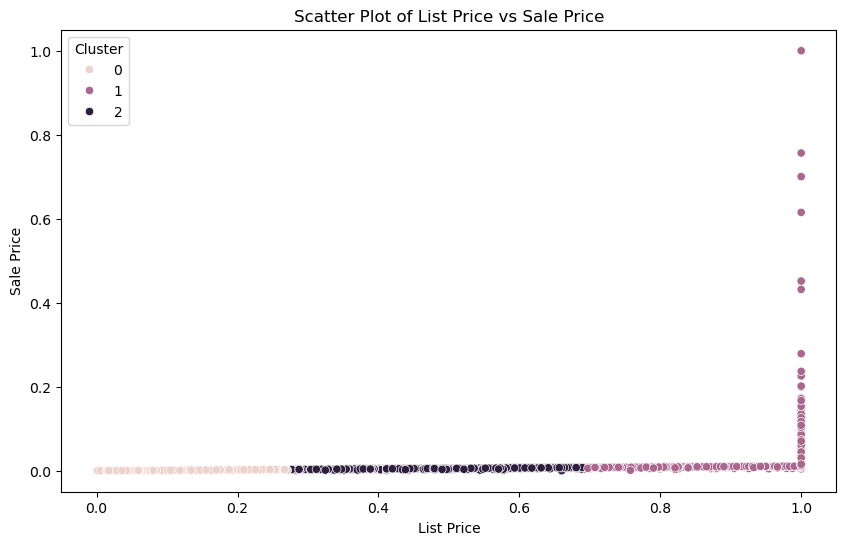

In [29]:
# Scatter plot for List Price vs Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='List Price', y='Sale Price', hue='Cluster', data=df)
plt.title('Scatter Plot of List Price vs Sale Price')
plt.show()

In [30]:
# 11. Statistical Analysis
print("\nStatistical summary of the dataset:")
print(df.describe())


Statistical summary of the dataset:
         List Price    Sale Price      Discount  Discount Percent  \
count  13051.000000  13051.000000  13051.000000      13051.000000   
mean       0.319786      0.006150      0.990143          0.986791   
std        0.330380      0.024735      0.023723          0.023699   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.088434      0.000898      0.992792          0.989133   
50%        0.158983      0.001711      0.992792          0.989133   
75%        0.453061      0.004764      0.992792          0.989133   
max        1.000000      1.000000      1.000000          1.000000   

               PCA1          PCA2        t-SNE1        t-SNE2       Cluster  \
count  1.305100e+04  1.305100e+04  13051.000000  13051.000000  13051.000000   
mean  -1.970856e-16 -4.369095e-17     -0.155445     -0.124215      0.499502   
std    3.306076e-01  3.980994e-02      8.227469      7.154738      0.749904   
min   -3.198219e-01 -3.59

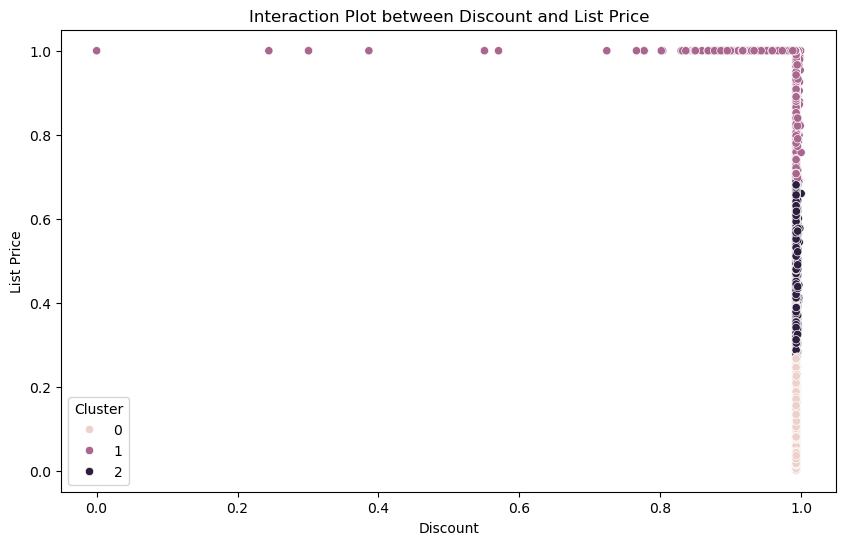

In [31]:
# 12. Feature Interaction Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='List Price', hue='Cluster', data=df)
plt.title('Interaction Plot between Discount and List Price')
plt.show()

In [32]:
# 13. Feature Importance using PCA explained variance
print("Explained Variance by each PCA component:")
print(pca.explained_variance_ratio_)

Explained Variance by each PCA component:
[0.98570191 0.01429233]
